In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
sns.set_style("darkgrid")

In [2]:
%load_ext sql

In [13]:
%sql sqlite:///CoolTshirts.db

### A.Get familiar with CoolTShirts

#####  1. How many campaigns and sources does CoolTShirts use? Which source is used for each campaign?<br>
--Use three queries:<br>
--one for the number of distinct campaigns,<br>
--one for the number of distinct sources,<br>
--one to find how they are related.

In [21]:
%%sql
SELECT 
    COUNT(DISTINCT utm_campaign) AS CountOfCompanies
FROM 
    page_visits;

 * sqlite:///CoolTshirts.db
Done.


CountOfCompanies
8


In [24]:
%%sql
SELECT 
    COUNT(DISTINCT utm_source) CountOfSource
FROM 
    page_visits


 * sqlite:///CoolTshirts.db
Done.


CountOfSource
6


In [29]:
%%sql
SELECT 
    DISTINCT utm_campaign, utm_source
FROM 
    page_visits
GROUP BY
    utm_campaign

 * sqlite:///CoolTshirts.db
Done.


utm_campaign,utm_source
cool-tshirts-search,google
getting-to-know-cool-tshirts,nytimes
interview-with-cool-tshirts-founder,medium
paid-search,google
retargetting-ad,facebook
retargetting-campaign,email
ten-crazy-cool-tshirts-facts,buzzfeed
weekly-newsletter,email


##### 2. What pages are on the CoolTShirts website?

In [30]:
%%sql
SELECT 
    DISTINCT page_name
FROM 
    page_visits

 * sqlite:///CoolTshirts.db
Done.


page_name
1 - landing_page
2 - shopping_cart
3 - checkout
4 - purchase


### B. What is the user journey?

##### 3. How many first touches is each campaign responsible for?

In [167]:
first_touches = %sql WITH first_touch AS \
                    (\
                    SELECT user_id,\
                    MIN(timestamp) as first_touch_at\
                    FROM page_visits\
                    GROUP BY user_id\
                    ),\
                    ft_attr AS\
                    (\
                    SELECT ft.user_id,\
                        ft.first_touch_at,\
                        pv.utm_source,\
                        pv.utm_campaign\
                    FROM first_touch ft\
                    JOIN page_visits pv\
                        ON ft.user_id = pv.user_id\
                        AND ft.first_touch_at = pv.timestamp\
                    )\
                    SELECT utm_source, utm_campaign, COUNT(DISTINCT user_id) count_of_first_touches\
                    FROM ft_attr\
                    GROUP BY 1, 2\
                    ORDER BY 3 DESC;


 * sqlite:///CoolTshirts.db
Done.


In [168]:
first_touches = first_touches.DataFrame()

In [169]:
first_touches

,utm_source,utm_campaign,count_of_first_touches
0,nytimes,getting-to-know-cool-tshirts,575
1,medium,interview-with-cool-tshirts-founder,571
2,buzzfeed,ten-crazy-cool-tshirts-facts,544
3,google,cool-tshirts-search,154
4,email,weekly-newsletter,49
5,facebook,retargetting-ad,42
6,email,retargetting-campaign,25
7,google,paid-search,21


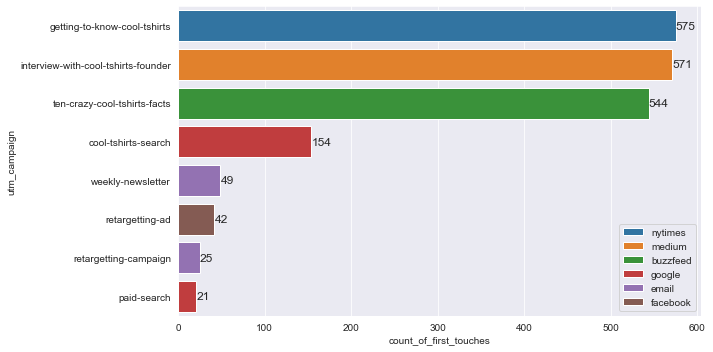

In [209]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=first_touches, y="utm_campaign", x="count_of_first_touches", hue="utm_source", dodge=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("1")

##### 4. How many last touches is each campaign responsible for?

In [171]:
last_touches = %sql WITH last_touch AS \
                    (\
                    SELECT user_id,\
                    MAX(timestamp) as last_touch_at\
                    FROM page_visits\
                    GROUP BY user_id\
                    ),\
                    lt_attr AS\
                    (\
                    SELECT ft.user_id,\
                        ft.last_touch_at,\
                        pv.utm_source,\
                            pv.utm_campaign\
                    FROM last_touch ft\
                    JOIN page_visits pv\
                        ON ft.user_id = pv.user_id\
                        AND ft.last_touch_at = pv.timestamp\
                    )\
                    SELECT utm_source, utm_campaign, COUNT(DISTINCT user_id) count_of_last_touches\
                    FROM lt_attr\
                    GROUP BY 1, 2\
                    ORDER BY 3 DESC;

 * sqlite:///CoolTshirts.db
Done.


In [172]:
last_touches = last_touches.DataFrame()

In [173]:
last_touches

,utm_source,utm_campaign,count_of_last_touches
0,email,weekly-newsletter,401
1,facebook,retargetting-ad,401
2,nytimes,getting-to-know-cool-tshirts,276
3,buzzfeed,ten-crazy-cool-tshirts-facts,229
4,medium,interview-with-cool-tshirts-founder,227
5,email,retargetting-campaign,219
6,google,paid-search,158
7,google,cool-tshirts-search,68


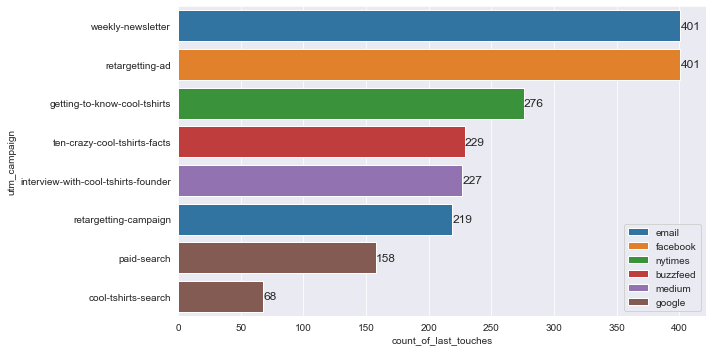

In [210]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=last_touches, y="utm_campaign", x="count_of_last_touches", hue="utm_source", dodge=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("2")

##### 5. How many visitors make a purchase?

In [115]:
%%sql
SELECT 
    COUNT(DISTINCT user_id) AS count_of_visitors
FROM 
    page_visits
WHERE
    page_name = '4 - purchase'

 * sqlite:///CoolTshirts.db
Done.


count_of_visitors
361


##### 6. How many last touches on the purchase page is each campaign responsible for?

In [175]:
purchase_page = %sql    WITH last_touch AS \
                        (\
                        SELECT user_id,\
                        MAX(timestamp) as last_touch_at\
                        FROM page_visits\
                        WHERE page_name = '4 - purchase'\
                        GROUP BY user_id\
                        ),\
                        lt_attr AS\
                        (\
                        SELECT ft.user_id,\
                            ft.last_touch_at,\
                            pv.utm_source,\
                                pv.utm_campaign\
                        FROM last_touch ft\
                        JOIN page_visits pv\
                            ON ft.user_id = pv.user_id\
                            AND ft.last_touch_at = pv.timestamp\
                        )\
                        SELECT utm_source, utm_campaign, COUNT(DISTINCT user_id) count_of_last_touches\
                        FROM lt_attr\
                        GROUP BY 1, 2\
                        ORDER BY 3 DESC;

 * sqlite:///CoolTshirts.db
Done.


In [176]:
purchase_page = purchase_page.DataFrame()

In [177]:
purchase_page

,utm_source,utm_campaign,count_of_last_touches
0,email,weekly-newsletter,115
1,facebook,retargetting-ad,113
2,email,retargetting-campaign,54
3,google,paid-search,52
4,buzzfeed,ten-crazy-cool-tshirts-facts,9
5,nytimes,getting-to-know-cool-tshirts,9
6,medium,interview-with-cool-tshirts-founder,7
7,google,cool-tshirts-search,2


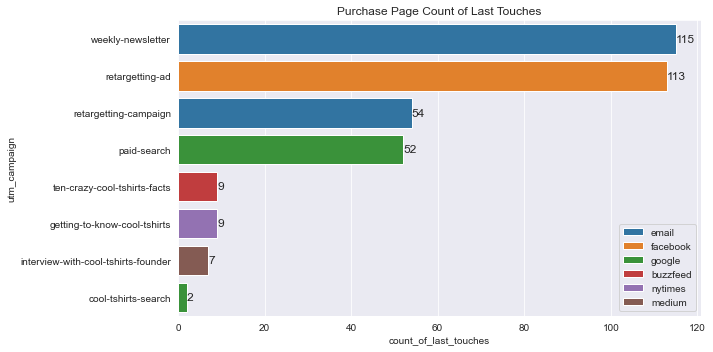

In [217]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=purchase_page, y="utm_campaign", x="count_of_last_touches", hue="utm_source", dodge=False)

for container in ax.containers:
    ax.bar_label(container, fontsize=12)

plt.legend(loc=4)
plt.title("Purchase Page Count of Last Touches")
plt.tight_layout()
plt.savefig("3")

##### CoolTShirts can re-invest in 5 campaigns. Given your findings in the project, which should they pick and why?

In [179]:
%%sql
WITH last_touch AS 
(
SELECT user_id,
MAX(timestamp) as last_touch_at
FROM page_visits
WHERE page_name = '4 - purchase'
GROUP BY user_id
),
lt_attr AS
(
SELECT ft.user_id,
    ft.last_touch_at,
    pv.utm_source,
        pv.utm_campaign
FROM last_touch ft
JOIN page_visits pv
    ON ft.user_id = pv.user_id
    AND ft.last_touch_at = pv.timestamp
)
SELECT utm_campaign, COUNT(DISTINCT user_id) count_of_last_touches
FROM lt_attr
GROUP BY  utm_campaign
ORDER BY 2 DESC
LIMIT 5

 * sqlite:///CoolTshirts.db
Done.


utm_campaign,count_of_last_touches
weekly-newsletter,115
retargetting-ad,113
retargetting-campaign,54
paid-search,52
ten-crazy-cool-tshirts-facts,9
